課題1

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
from scipy import linalg
import random
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#外乱トルク
M_n = np.zeros(3)
#制御トルク
M_c = np.zeros(3)
#トルク合計
M = M_n + M_c

In [ ]:
I_x = 1.9
I_y = 1.6
I_z = 2.0
omega_s = 2*np.pi*17/60
omega_init = np.array([0.1, omega_s+0.1, 0.0])
q_init = np.array([1.0, 0.0, 0.0, 0.0])

In [ ]:
def f1(t, omega, M):
  return np.array([(M[0]- (I_z - I_y)) / I_x * omega[1] * omega[2], (M[1]- (I_x - I_z)) / I_y * omega[2] * omega[0], (M[2]- (I_y - I_x)) / I_z * omega[0] * omega[1]])
def f2(t, omega, q):
  return 1/2 * np.dot(np.array([[-q[1], -q[2], -q[3]],
                        [q[0], -q[3], q[2]],
                        [q[3], q[0], -q[1]],
                        [-q[2], q[1], q[0]]]),
                     np.array([omega[0], omega[1],omega[2]]))

In [ ]:
def runge_kutta(omega_init, q_init, t0=0, te=100, h=0.01): #t0:開始時間, te:終了時間, h:時間間隔
    ts = np.arange(t0, te, h); #時間のリストを得る
    omega_x_list = []
    omega_y_list = []
    omega_z_list = []
    q_0_list = []
    q_1_list = []
    q_2_list = []
    q_3_list = []
    omega  = omega_init
    q = q_init
    for t in ts:
      #omega記録
      omega_x_list.append(omega[0])
      omega_y_list.append(omega[1])
      omega_z_list.append(omega[2])
      #q記録
      q_0_list.append(q[0])
      q_1_list.append(q[1])
      q_2_list.append(q[2])
      q_3_list.append(q[3])

      #runge_kutta
      k1 = []
      k2 = []
      k3 = []
      k4 = []
      k1.append(f1(t, omega, M))
      k1.append(f2(t, omega, q))
      k2.append(f1(t+h/2, omega+h/2*k1[0], M))
      k2.append(f2(t+h/2, omega+h/2*k1[0], q+h/2*k1[1]))
      k3.append(f1(t+h/2, omega+h/2*k2[0], M))
      k3.append(f2(t+h/2, omega+h/2*k2[0], q+h/2*k2[1]))
      k4.append(f1(t+h, omega+h*k3[0], M))
      k4.append(f2(t+h, omega+h*k3[0], q+h*k3[1]))
      omega_dot = (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6
      q_dot = (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6

      #print(omega_dot)
      #print(q_dot)
      #omega更新
      omega += omega_dot * h
      #q更新
      q += q_dot * h

    return (ts, omega_x_list, omega_y_list, omega_z_list, q_0_list, q_1_list, q_2_list, q_3_list)

In [ ]:
ts, omega_x_list, omega_y_list, omega_z_list, q_0_list, q_1_list, q_2_list, q_3_list = runge_kutta(omega_init=omega_init, q_init=q_init)

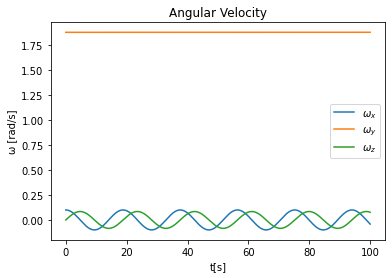

In [ ]:
plt.plot(ts, omega_x_list, label='$\omega_{x}$')
plt.plot(ts, omega_y_list, label='$\omega_{y}$')
plt.plot(ts, omega_z_list, label='$\omega_{z}$')
plt.title('Angular Velocity')
plt.xlabel('t[s]')
plt.ylabel('ω [rad/s]')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/AeroAngular_Velocity.png', dpi=300)
plt.show()

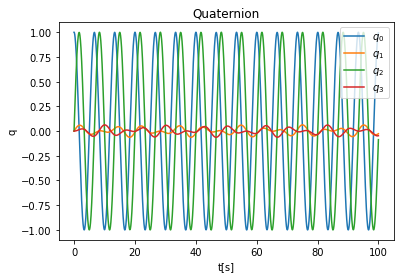

In [ ]:
plt.plot(ts, q_0_list, label='$q_{0}$')
plt.plot(ts, q_1_list, label='$q_{1}$')
plt.plot(ts, q_2_list, label='$q_{2}$')
plt.plot(ts, q_3_list, label='$q_{3}$')
plt.title('Quaternion')
plt.xlabel('t[s]')
plt.ylabel('q')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/Quaternion.png', dpi=300)
plt.show()

課題2

In [ ]:
I_x = 1.9
I_y = 1.6
I_z = 2.0
omega_s = 2*np.pi*17/60
omega_init = np.array([0.1, omega_s+0.1, 0.0])
q_init = np.array([1.0, 0.0, 0.0, 0.0])

In [ ]:
def f1(t, omega, M):
  return np.array([(M[0,0]- (I_z - I_y)) / I_x * omega[1] * omega[2], (M[1,1]- (I_x - I_z)) / I_y * omega[2] * omega[0], (M[2,2]- (I_y - I_x)) / I_z * omega[0] * omega[1]])
def f2(t, omega, q):
  return 1/2 * np.dot(np.array([[-q[1], -q[2], -q[3]],
                        [q[0], -q[3], q[2]],
                        [q[3], q[0], -q[1]],
                        [-q[2], q[1], q[0]]]),
                     np.array([omega[0], omega[1],omega[2]]))
def get_obs(q, random_column, v=np.zeros(3)):
  obs = np.array([
                [q[0]**2 + q[1]**2 - q[2]**2 - q[3]**2, 2 * (q[1] * q[2] + q[0] * q[3]), 2 * (q[1] * q[3] - q[0] * q[2])],
                [2 * (q[1] * q[2] - q[0] * q[3]), q[0]**2 - q[1]**2 + q[2]**2 - q[3]**2, 2 * (q[2] * q[3] + q[0] * q[1])],
                [2 * (q[1] * q[3] + q[0] * q[2]), 2 * (q[1] * q[3] - q[0] * q[2]), q[0]**2 - q[1]**2 - q[2]**2 + q[3]**2]
                ])[random_column] + v

  return obs

In [ ]:
def kalman_filter(omega_init, q_init, t0=0, te=100, h=0.01, delta_t = 0.1, SEED=0): #t0:開始時間, te:終了時間, h:時間間隔, delta_t:フィルタリング間隔
    np.random.seed(SEED)
    ts = np.arange(t0, te, h); #時間のリストを得る
    omega_true_x_list = []
    omega_true_y_list = []
    omega_true_z_list = []
    q_true_0_list = []
    q_true_1_list = []
    q_true_2_list = []
    q_true_3_list = []
    omega_est_x_list = []
    omega_est_y_list = []
    omega_est_z_list = []
    q_est_0_list = []
    q_est_1_list = []
    q_est_2_list = []
    q_est_3_list = []
    x_list = []
    P_list = []
    omega_true  = omega_init
    q_true = q_init
    omega_est = omega_true + np.random.randn(3)
    q_est = q_true + np.random.randn(4)
    x_ = np.append(q_true, omega_true) - np.append(q_est, omega_est)
    P = np.eye(7) * np.random.randn(1)
    Q = np.eye(3) * 0.01**2
    R = np.eye(3) * 0.01**2
    random_column_list = [np.random.randint(0, 3) for i in range(round(te/delta_t)+2)]
    i = 0

    for t in ts:
      #omega_true記録
      omega_true_x_list.append(omega_true[0])
      omega_true_y_list.append(omega_true[1])
      omega_true_z_list.append(omega_true[2])
      #q_true記録
      q_true_0_list.append(q_true[0])
      q_true_1_list.append(q_true[1])
      q_true_2_list.append(q_true[2])
      q_true_3_list.append(q_true[3])
      #omega_est記録
      omega_est_x_list.append(omega_est[0])
      omega_est_y_list.append(omega_est[1])
      omega_est_z_list.append(omega_est[2])
      #q_est記録
      q_est_0_list.append(q_est[0])
      q_est_1_list.append(q_est[1])
      q_est_2_list.append(q_est[2])
      q_est_3_list.append(q_est[3])
      #x_記録


      #true状態量計算

      #M行列
      M_true = np.array([[np.random.normal(0, 0.01), 0, 0],
                         [0, np.random.normal(0, 0.01), 0],
                         [0, 0, np.random.normal(0, 0.01)]])

      #runge_kutta
      k1 = []
      k2 = []
      k3 = []
      k4 = []
      k1.append(f1(t, omega_true, M_true))
      k1.append(f2(t, omega_true, q_true))
      k2.append(f1(t+h/2, omega_true+h/2*k1[0], M_true))
      k2.append(f2(t+h/2, omega_true+h/2*k1[0], q_true+h/2*k1[1]))
      k3.append(f1(t+h/2, omega_true+h/2*k2[0], M_true))
      k3.append(f2(t+h/2, omega_true+h/2*k2[0], q_true+h/2*k2[1]))
      k4.append(f1(t+h, omega_true+h*k3[0], M_true))
      k4.append(f2(t+h, omega_true+h*k3[0], q_true+h*k3[1]))
      omega_dot = (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6
      q_dot = (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6

      #omega更新
      omega_true_next = omega_true + omega_dot * h
      #q更新
      q_true_next = q_true + q_dot * h

      #est状態量計算

      #runge_kutta
      k1 = []
      k2 = []
      k3 = []
      k4 = []
      k1.append(f1(t, omega_est, np.zeros((3,3))))
      k1.append(f2(t, omega_est, q_est))
      k2.append(f1(t+h/2, omega_est+h/2*k1[0], np.zeros((3,3))))
      k2.append(f2(t+h/2, omega_est+h/2*k1[0], q_est+h/2*k1[1]))
      k3.append(f1(t+h/2, omega_est+h/2*k2[0], np.zeros((3,3))))
      k3.append(f2(t+h/2, omega_est+h/2*k2[0], q_est+h/2*k2[1]))
      k4.append(f1(t+h, omega_est+h*k3[0], np.zeros((3,3))))
      k4.append(f2(t+h, omega_est+h*k3[0], q_est+h*k3[1]))
      omega_dot = (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])/6
      q_dot = (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])/6

      #omega更新
      omega_est_next = omega_est + omega_dot * h
      #q更新
      q_est_next = q_est + q_dot * h

      A = np.array([
          [0, -omega_est[0] / 2, -omega_est[1] / 2, -omega_est[2] / 2, -q_est[1] / 2, -q_est[2] / 2, -q_est[3] / 2],
          [omega_est[0] / 2, 0, omega_est[2] / 2, -omega_est[1] / 2, q_est[0] / 2, -q_est[3] / 2, q_est[2] / 2],
          [omega_est[1] / 2, -omega_est[2] / 2, 0, omega_est[0] / 2, q_est[3] / 2, q_est[0] / 2, -q_est[1] / 2],
          [omega_est[2] / 2, omega_est[1] / 2, -omega_est[0] / 2, 0, -q_est[2] / 2, q_est[1] / 2, q_est[0] / 2],
          [0, 0, 0, 0, 0, -(I_z - I_y) * omega_est[2] / I_x, -(I_z - I_y) * omega_est[1] / I_x],
          [0, 0, 0, 0, -(I_x - I_z) * omega_est[2] / I_y, 0, -(I_x - I_z) * omega_est[0] / I_y],
          [0, 0, 0, 0, -(I_y - I_x) * omega_est[1] / I_z, -(I_y - I_x) * omega_est[0] / I_z, 0]
          ])
      B = np.array([
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [1 / I_x, 0, 0],
            [0, 1 / I_y, 0],
            [0, 0, 1 / I_z],
            ])
      Phi = scipy.linalg.expm(A * h)
      Gamma = np.dot(np.linalg.inv(A), np.dot((Phi - np.eye(7)), B))
      x_ = np.dot(Phi, x_)
      M = np.dot(Phi, np.dot(P, Phi.T)) + np.dot(Gamma, np.dot(Q, Gamma.T))
      P = M

      q_true = q_true_next
      omega_true = omega_true_next
      q_est = q_est_next
      omega_est = omega_est_next
      x_list.append(x_)
      
      #フィルタリング
      if (t*10) % (delta_t*10) == 0:
        random_column = random_column_list[i]
        v = np.random.normal(0, 0.01, 3)
        z = get_obs(q_true, random_column, v) - get_obs(q_est, random_column)
        H = np.array([
            [
                [2 * q_est[0], 2 * q_est[1], -2 * q_est[2], -2 * q_est[3], 0, 0, 0],
                [2 * q_est[3], 2 * q_est[2], 2 * q_est[1], 2 * q_est[0], 0, 0, 0],
                [-2 * q_est[2], 2 * q_est[3], -2 * q_est[0], 2 * q_est[1], 0, 0, 0]
            ],
            [
                [-2 * q_est[3], 2 * q_est[2], 2 * q_est[1], -2 * q_est[0], 0, 0, 0],
                [2 * q_est[0], -2 * q_est[1], 2 * q_est[2], -2 * q_est[3], 0, 0, 0],
                [2 * q_est[1], 2 * q_est[0], 2 * q_est[3], 2 * q_est[2], 0, 0, 0]
            ],
            [
                [2 * q_est[2], 2 * q_est[3], 2 * q_est[0], 2 * q_est[1], 0, 0, 0],
                [-2 * q_est[1], -2 * q_est[0], 2 * q_est[3], 2 * q_est[2], 0, 0, 0],
                [2 * q_est[0], -2 * q_est[1], -2 * q_est[2], 2 * q_est[3], 0, 0, 0]
            ]
        ])[random_column]
        tmp = np.linalg.inv(np.dot(H, np.dot(M, H.T)) + R)
        P = M - np.dot(np.dot(M, H.T), np.dot(tmp, np.dot(H, M)))
        K = np.dot(P, np.dot(H.T, np.linalg.inv(R)))
        x_ += np.dot(K, z - np.dot(H, x_))
        q_est += x_[0:4]
        omega_est += x_[4:]
        x_list[-1] = x_
        x_ = np.zeros(7)
        M = P
        i += 1
      P_list.append(np.sqrt(np.abs(P.flatten())))
      q_true = q_true / np.sqrt(q_true[0]**2 + q_true[1]**2 + q_true[2]**2 + q_true[3]**2)
      q_est = q_est / np.sqrt(q_est[0]**2 + q_est[1]**2 + q_est[2]**2 + q_est[3]**2)
    return (ts, P_list, x_list, omega_true_x_list, omega_true_y_list, omega_true_z_list, q_true_0_list, q_true_1_list, \
            q_true_2_list, q_true_3_list, omega_est_x_list, omega_est_y_list, omega_est_z_list, q_est_0_list, q_est_1_list, q_est_2_list, q_est_3_list)

In [ ]:
ts, P_list, x_list, omega_true_x_list, omega_true_y_list, omega_true_z_list, q_true_0_list, q_true_1_list, \
q_true_2_list, q_true_3_list, omega_est_x_list, omega_est_y_list, omega_est_z_list, q_est_0_list, q_est_1_list, q_est_2_list, q_est_3_list\
= kalman_filter(omega_init, q_init, t0=0, te=100, h=0.01, delta_t = 1, SEED=7)

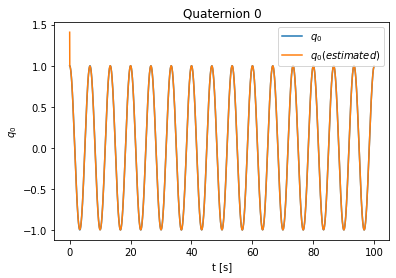

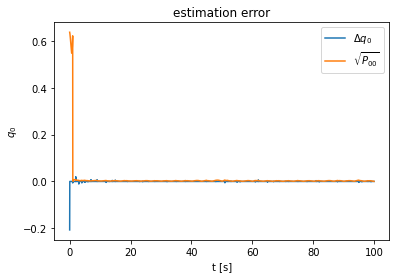

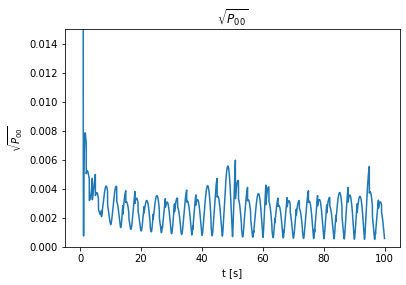

In [ ]:
plt.plot(ts, q_true_0_list, label='$q_{0}$')
plt.plot(ts, q_est_0_list, label='$q_{0}(estimated)$')
plt.title("Quaternion 0")
plt.xlabel("t [s]")
plt.ylabel('$q_{0}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q0_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 0], label='$\Delta q_{0}$')
plt.plot(ts, np.array(P_list)[:, 0], label="$\sqrt{P_{00}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$q_{0}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q0_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 0], label="$\sqrt{P_{00}}$")
plt.title("$\sqrt{P_{00}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{00}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q0_3.png',dpi=300)
plt.show()

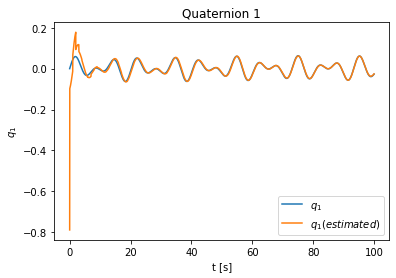

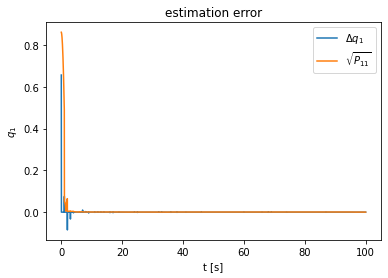

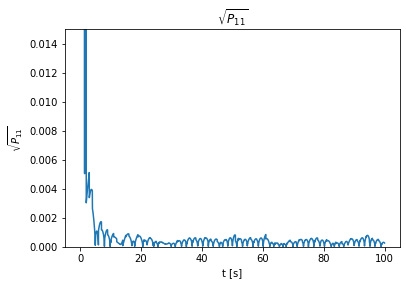

In [ ]:
plt.plot(ts, q_true_1_list, label='$q_{1}$')
plt.plot(ts, q_est_1_list, label='$q_{1}(estimated)$')
plt.title("Quaternion 1")
plt.xlabel("t [s]")
plt.ylabel('$q_{1}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q1_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 1], label='$\Delta q_{1}$')
plt.plot(ts, np.array(P_list)[:, 1], label="$\sqrt{P_{11}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$q_{1}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q1_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 1], label="$\sqrt{P_{11}}$")
plt.title("$\sqrt{P_{11}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{11}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q1_3.png',dpi=300)
plt.show()

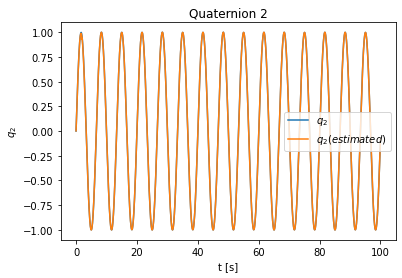

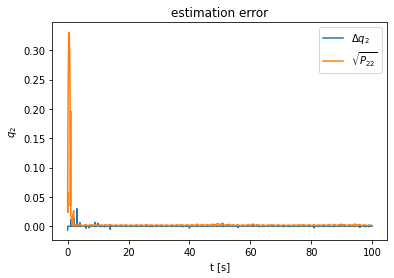

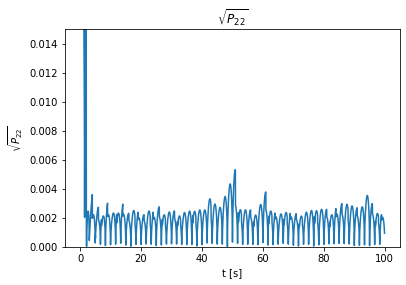

In [ ]:
plt.plot(ts, q_true_2_list, label='$q_{2}$')
plt.plot(ts, q_est_2_list, label='$q_{2}(estimated)$')
plt.title("Quaternion 2")
plt.xlabel("t [s]")
plt.ylabel('$q_{2}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q2_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 2], label='$\Delta q_{2}$')
plt.plot(ts, np.array(P_list)[:, 2], label="$\sqrt{P_{22}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$q_{2}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q2_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 2], label="$\sqrt{P_{22}}$")
plt.title("$\sqrt{P_{22}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{22}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q2_3.png',dpi=300)
plt.show()

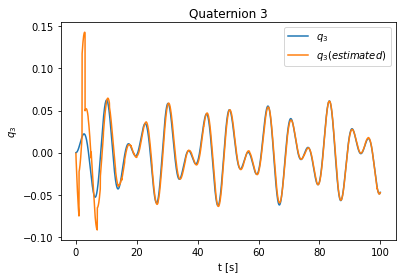

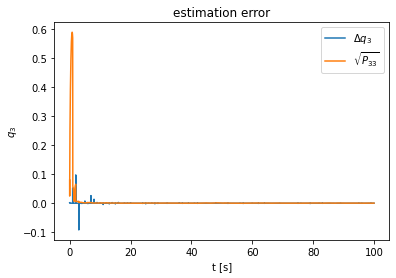

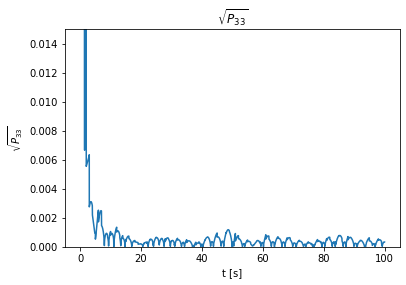

In [ ]:
plt.plot(ts, q_true_3_list, label='$q_{3}$')
plt.plot(ts, q_est_3_list, label='$q_{3}(estimated)$')
plt.title("Quaternion 3")
plt.xlabel("t [s]")
plt.ylabel('$q_{3}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q3_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 3], label='$\Delta q_{3}$')
plt.plot(ts, np.array(P_list)[:, 3], label="$\sqrt{P_{33}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$q_{3}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q3_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 3], label="$\sqrt{P_{33}}$")
plt.title("$\sqrt{P_{33}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{33}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q3_3.png',dpi=300)
plt.show()

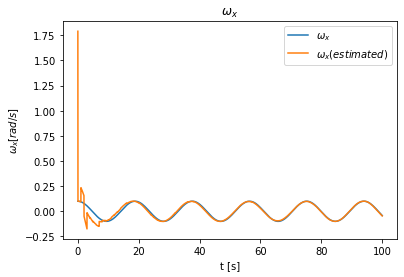

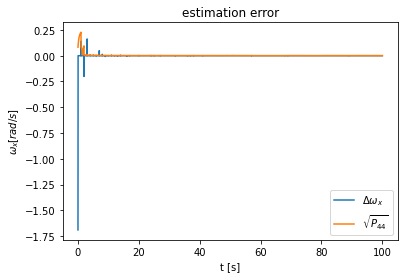

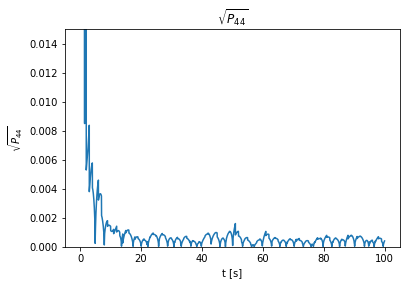

In [ ]:
plt.plot(ts, omega_true_x_list,label='$\omega_{x}$')
plt.plot(ts, omega_est_x_list,label='$\omega_{x}(estimated)$')
plt.title("$\omega_{x}$")
plt.xlabel("t [s]")
plt.ylabel("$\omega_{x}$$[rad/s]$")
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_x_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 4], label='$\Delta \omega_{x}$')
plt.plot(ts, np.array(P_list)[:, 4], label="$\sqrt{P_{44}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$\omega_{x}$$[rad/s]$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_x_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 4], label="$\sqrt{P_{44}}$")
plt.title("$\sqrt{P_{44}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{44}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_x_3.png',dpi=300)
plt.show()

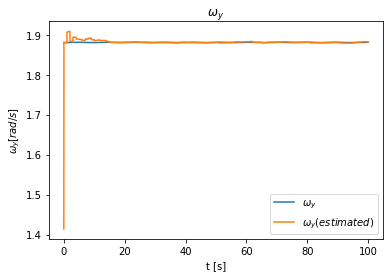

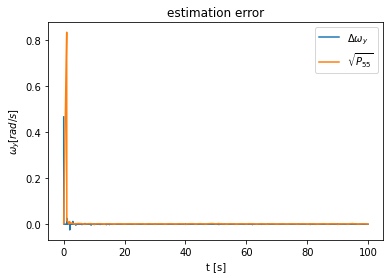

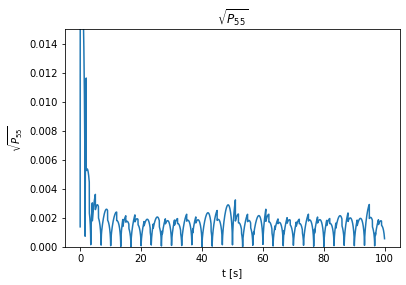

In [ ]:
plt.plot(ts, omega_true_y_list,label='$\omega_{y}$')
plt.plot(ts, omega_est_y_list,label='$\omega_{y}(estimated)$')
plt.title("$\omega_{y}$")
plt.xlabel("t [s]")
plt.ylabel("$\omega_{y}$$[rad/s]$")
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_y_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 5], label='$\Delta \omega_{y}$')
plt.plot(ts, np.array(P_list)[:, 5], label="$\sqrt{P_{55}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$\omega_{y}$$[rad/s]$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_y_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 5], label="$\sqrt{P_{55}}$")
plt.title("$\sqrt{P_{55}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{55}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_y_3.png',dpi=300)
plt.show()

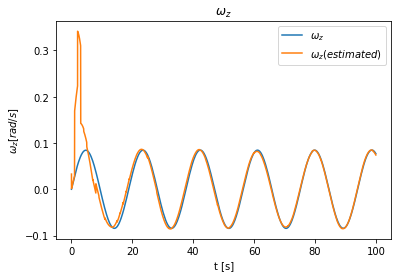

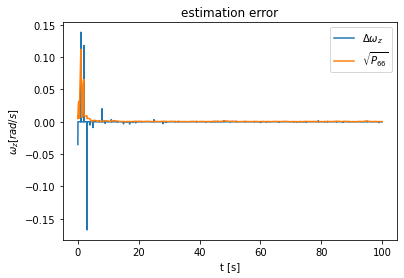

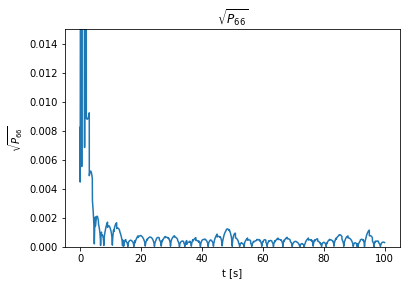

In [ ]:
plt.plot(ts, omega_true_z_list,label='$\omega_{z}$')
plt.plot(ts, omega_est_z_list,label='$\omega_{z}(estimated)$')
plt.title("$\omega_{z}$")
plt.xlabel("t [s]")
plt.ylabel("$\omega_{z}$$[rad/s]$")
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_z_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 6], label='$\Delta \omega_{z}$')
plt.plot(ts, np.array(P_list)[:, 6], label="$\sqrt{P_{66}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$\omega_{z}$$[rad/s]$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_z_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 6], label="$\sqrt{P_{66}}$")
plt.title("$\sqrt{P_{66}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{66}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_z_3.png',dpi=300)
plt.show()

考察

In [ ]:
ts, P_list, x_list, omega_true_x_list, omega_true_y_list, omega_true_z_list, q_true_0_list, q_true_1_list, \
q_true_2_list, q_true_3_list, omega_est_x_list, omega_est_y_list, omega_est_z_list, q_est_0_list, q_est_1_list, q_est_2_list, q_est_3_list\
= kalman_filter(omega_init, q_init, t0=0, te=100, h=0.001, delta_t = 1, SEED=7)

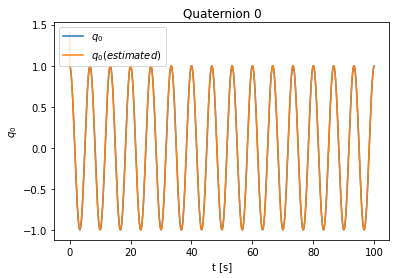

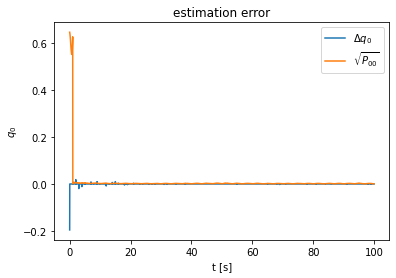

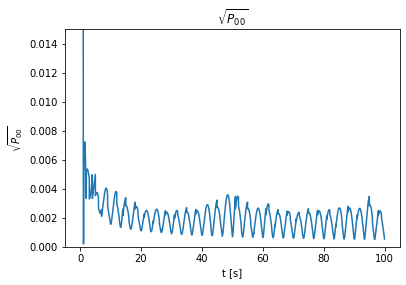

In [ ]:
plt.plot(ts, q_true_0_list, label='$q_{0}$')
plt.plot(ts, q_est_0_list, label='$q_{0}(estimated)$')
plt.title("Quaternion 0")
plt.xlabel("t [s]")
plt.ylabel('$q_{0}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q0_1_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 0], label='$\Delta q_{0}$')
plt.plot(ts, np.array(P_list)[:, 0], label="$\sqrt{P_{00}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$q_{0}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q0_1_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 0], label="$\sqrt{P_{00}}$")
plt.title("$\sqrt{P_{00}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{00}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q0_1_3.png',dpi=300)
plt.show()

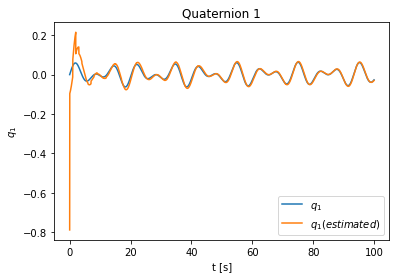

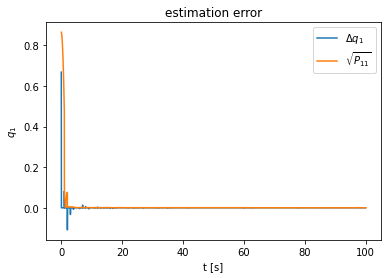

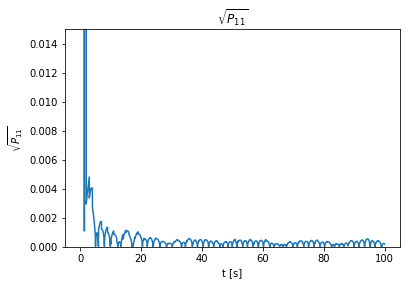

In [ ]:
plt.plot(ts, q_true_1_list, label='$q_{1}$')
plt.plot(ts, q_est_1_list, label='$q_{1}(estimated)$')
plt.title("Quaternion 1")
plt.xlabel("t [s]")
plt.ylabel('$q_{1}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q1_1_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 1], label='$\Delta q_{1}$')
plt.plot(ts, np.array(P_list)[:, 1], label="$\sqrt{P_{11}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$q_{1}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q1_1_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 1], label="$\sqrt{P_{11}}$")
plt.title("$\sqrt{P_{11}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{11}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q1_1_3.png',dpi=300)
plt.show()

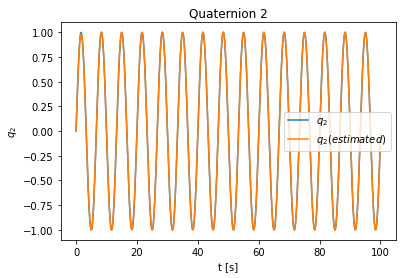

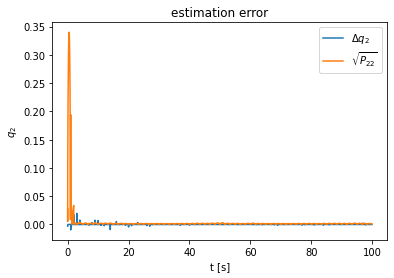

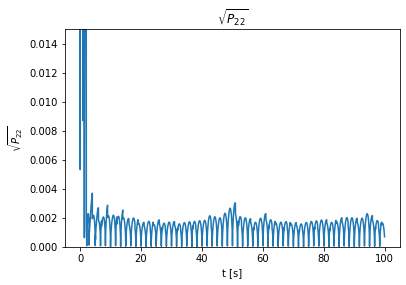

In [ ]:
plt.plot(ts, q_true_2_list, label='$q_{2}$')
plt.plot(ts, q_est_2_list, label='$q_{2}(estimated)$')
plt.title("Quaternion 2")
plt.xlabel("t [s]")
plt.ylabel('$q_{2}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q2_1_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 2], label='$\Delta q_{2}$')
plt.plot(ts, np.array(P_list)[:, 2], label="$\sqrt{P_{22}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$q_{2}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q2_1_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 2], label="$\sqrt{P_{22}}$")
plt.title("$\sqrt{P_{22}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{22}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q2_1_3.png',dpi=300)
plt.show()

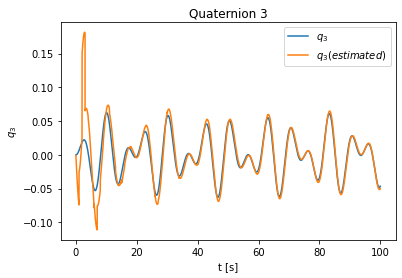

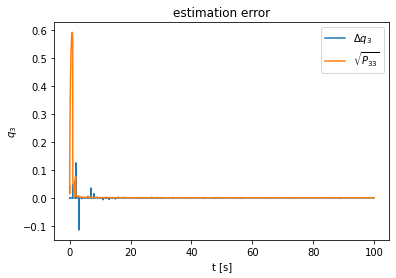

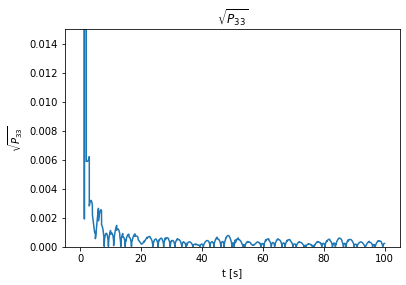

In [ ]:
plt.plot(ts, q_true_3_list, label='$q_{3}$')
plt.plot(ts, q_est_3_list, label='$q_{3}(estimated)$')
plt.title("Quaternion 3")
plt.xlabel("t [s]")
plt.ylabel('$q_{3}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q3_1_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 3], label='$\Delta q_{3}$')
plt.plot(ts, np.array(P_list)[:, 3], label="$\sqrt{P_{33}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$q_{3}$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q3_1_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 3], label="$\sqrt{P_{33}}$")
plt.title("$\sqrt{P_{33}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{33}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/q3_1_3.png',dpi=300)
plt.show()

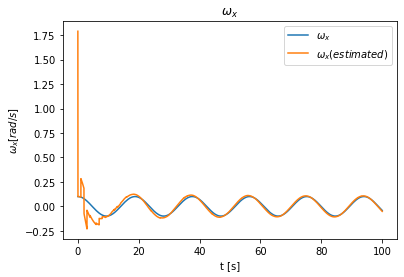

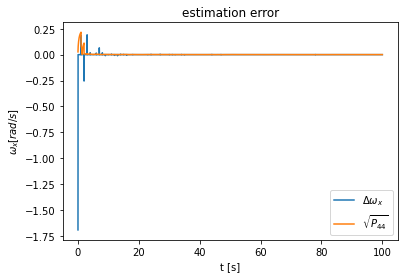

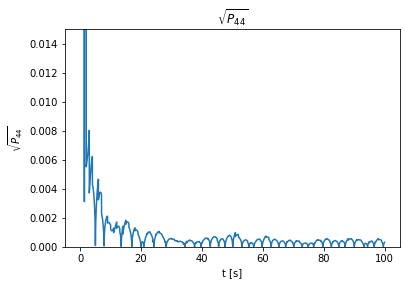

In [ ]:
plt.plot(ts, omega_true_x_list,label='$\omega_{x}$')
plt.plot(ts, omega_est_x_list,label='$\omega_{x}(estimated)$')
plt.title("$\omega_{x}$")
plt.xlabel("t [s]")
plt.ylabel("$\omega_{x}$$[rad/s]$")
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_x_1_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 4], label='$\Delta \omega_{x}$')
plt.plot(ts, np.array(P_list)[:, 4], label="$\sqrt{P_{44}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$\omega_{x}$$[rad/s]$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_x_1_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 4], label="$\sqrt{P_{44}}$")
plt.title("$\sqrt{P_{44}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{44}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_x_1_3.png',dpi=300)
plt.show()

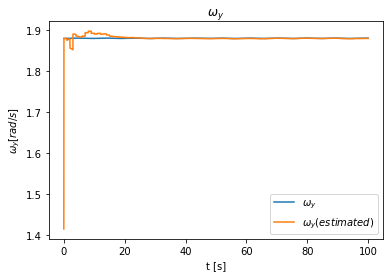

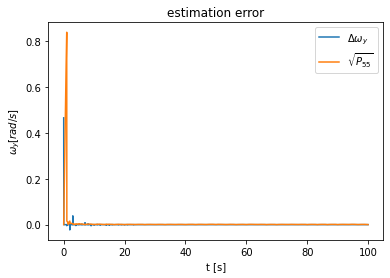

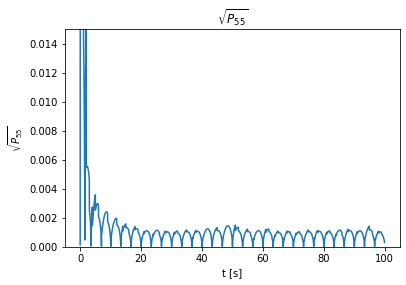

In [ ]:
plt.plot(ts, omega_true_y_list,label='$\omega_{y}$')
plt.plot(ts, omega_est_y_list,label='$\omega_{y}(estimated)$')
plt.title("$\omega_{y}$")
plt.xlabel("t [s]")
plt.ylabel("$\omega_{y}$$[rad/s]$")
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_y_1_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 5], label='$\Delta \omega_{y}$')
plt.plot(ts, np.array(P_list)[:, 5], label="$\sqrt{P_{55}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$\omega_{y}$$[rad/s]$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_y_1_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 5], label="$\sqrt{P_{55}}$")
plt.title("$\sqrt{P_{55}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{55}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_y_1_3.png',dpi=300)
plt.show()

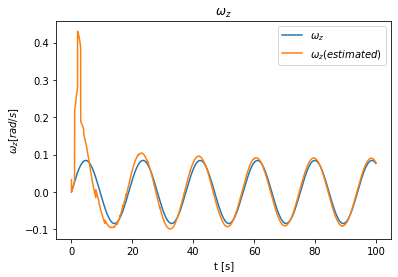

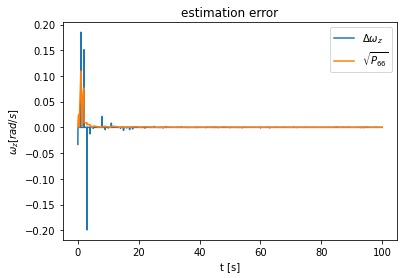

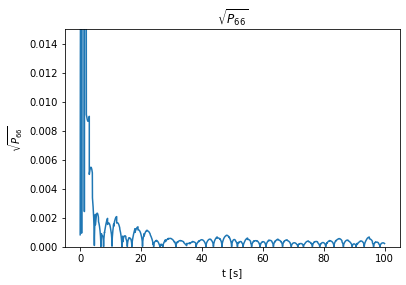

In [ ]:
plt.plot(ts, omega_true_z_list,label='$\omega_{z}$')
plt.plot(ts, omega_est_z_list,label='$\omega_{z}(estimated)$')
plt.title("$\omega_{z}$")
plt.xlabel("t [s]")
plt.ylabel("$\omega_{z}$$[rad/s]$")
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_z_1_1.png',dpi=300)
plt.show()
plt.plot(ts, np.array(x_list)[:, 6], label='$\Delta \omega_{z}$')
plt.plot(ts, np.array(P_list)[:, 6], label="$\sqrt{P_{66}}$")
plt.title("estimation error")
plt.xlabel("t [s]")
plt.ylabel('$\omega_{z}$$[rad/s]$')
plt.legend()
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_z_1_2.png',dpi=300)
plt.show()
plt.plot(ts, np.array(P_list)[:, 6], label="$\sqrt{P_{66}}$")
plt.title("$\sqrt{P_{66}}$")
plt.xlabel("t [s]")
plt.ylabel("$\sqrt{P_{66}}$")
plt.ylim([0,0.015])
plt.savefig('/content/drive/MyDrive/Spacecraft Control/omega_z_1_3.png',dpi=300)
plt.show()